In [20]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz, plot_tree
import graphviz

In [21]:
df = pd.read_csv('Overall.csv', delimiter=',',on_bad_lines='skip')

In [22]:
meanDF = df
meanDF = meanDF.drop(columns=['Date', 'Average', 'Median', 'Quantile'])

In [23]:
meanDF['Mean'] = meanDF['Mean'].map({'low':0,'high':1})

X = meanDF.drop(['Mean', 'IMDbRating'], axis=1)
y = meanDF['Mean']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [39]:
estx = 100
esty = 500
depx = 1
depy = 4
niter = 10
folds = 5

In [25]:
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001783CB46650>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000178406DB9D0>})

In [26]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 237}


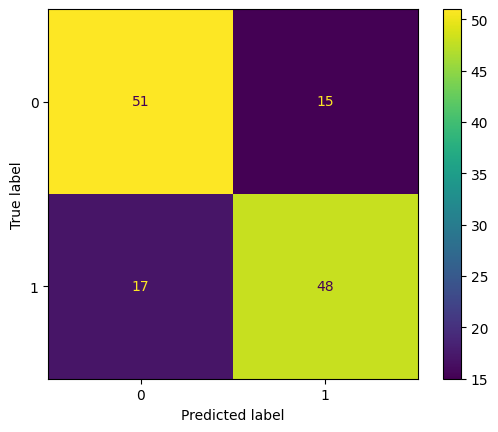

In [27]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7557251908396947
Precision: 0.7619047619047619
Recall: 0.7384615384615385



(process:10528): Pango-WARNING **: 12:52:53.535: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


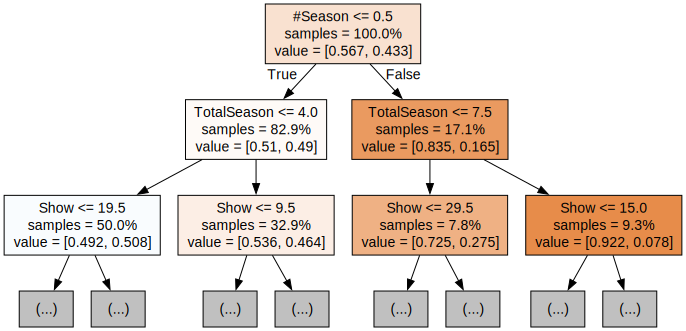


(process:14472): Pango-WARNING **: 12:52:54.009: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


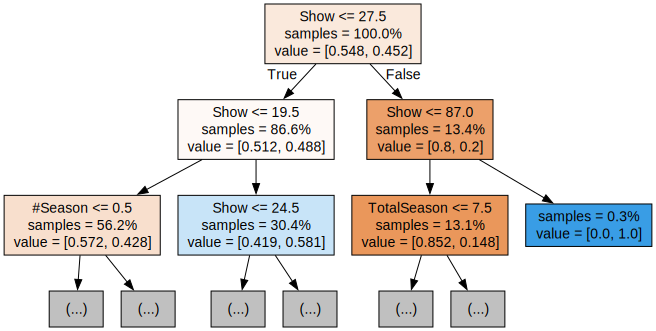


(process:18808): Pango-WARNING **: 12:52:54.485: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


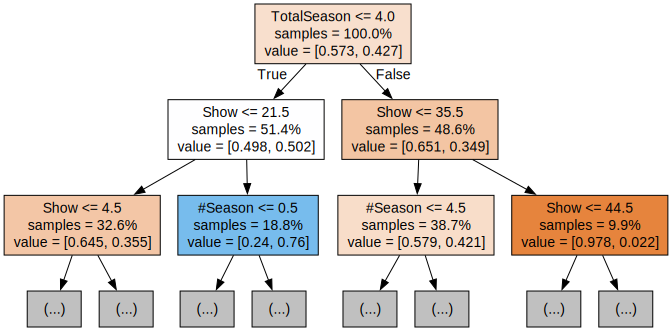

In [29]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

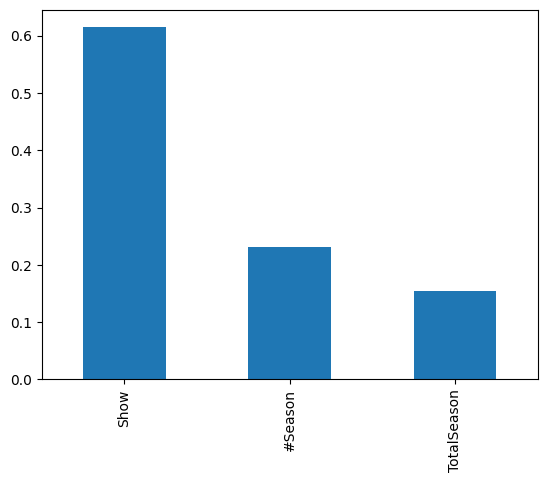

In [30]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Test Size:  0.1
Best hyperparameters: {'max_depth': 3, 'n_estimators': 465}
Accuracy: 0.7272727272727273
Precision: 0.7419354838709677
Recall: 0.696969696969697


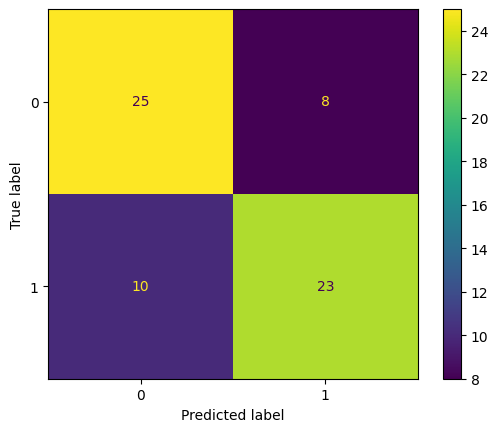

In [31]:
s = 0.1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=s)
print('Test Size: ',s)

param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


(process:22120): Pango-WARNING **: 12:53:06.331: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


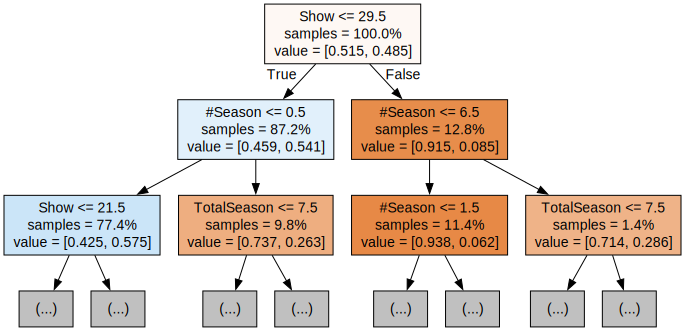


(process:11432): Pango-WARNING **: 12:53:06.802: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


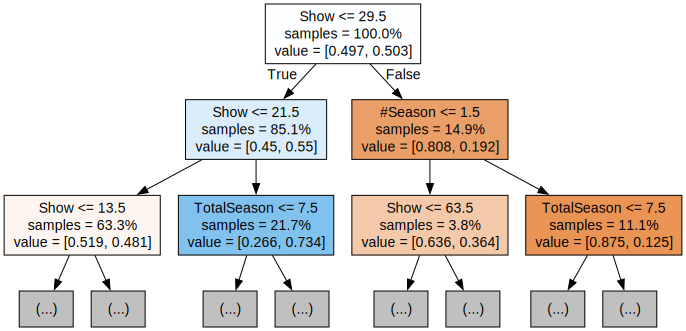


(process:22968): Pango-WARNING **: 12:53:07.387: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


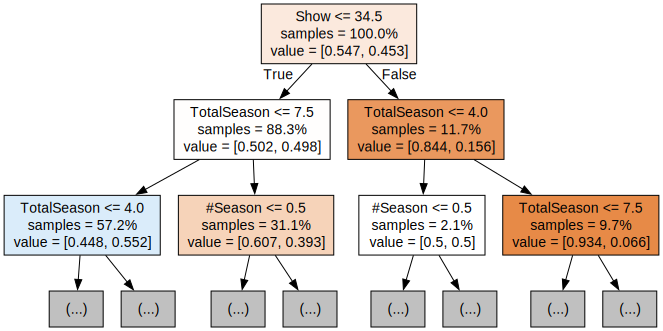

In [32]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Test Size:  0.3
Best hyperparameters: {'max_depth': 3, 'n_estimators': 104}
Accuracy: 0.7142857142857143
Precision: 0.7848101265822784
Recall: 0.6138613861386139


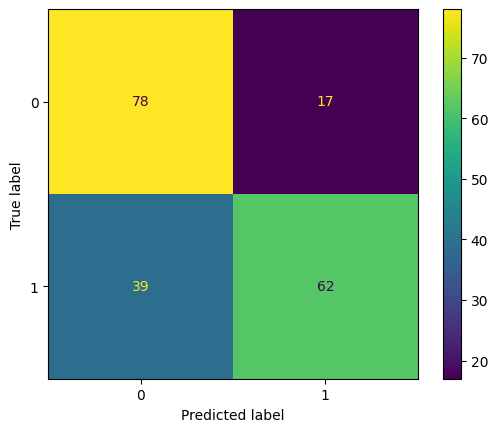

In [33]:
s = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=s)
print('Test Size: ', s)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


(process:7364): Pango-WARNING **: 12:53:16.382: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


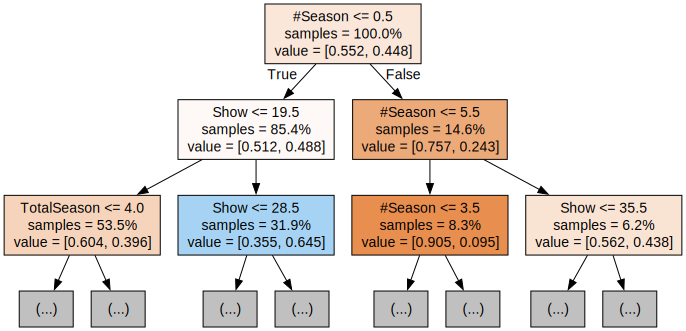


(process:21868): Pango-WARNING **: 12:53:16.865: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


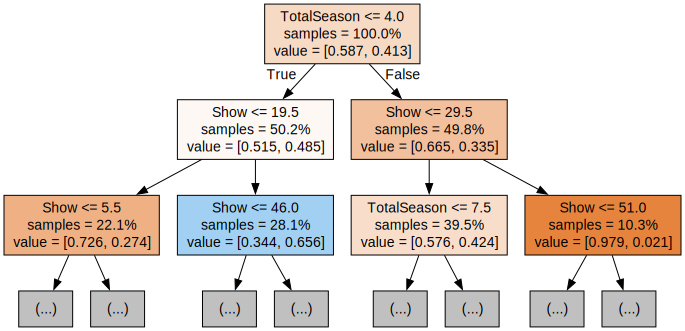


(process:6320): Pango-WARNING **: 12:53:17.346: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


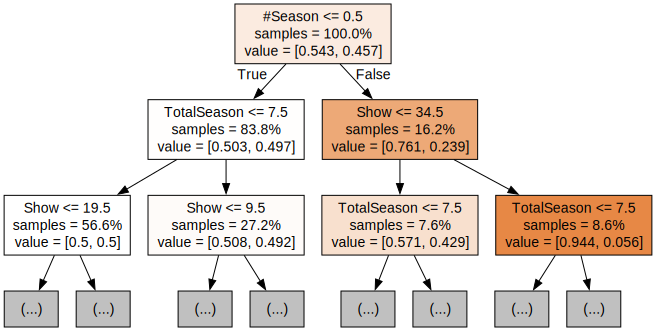

In [34]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Test Size:  0.4
Best hyperparameters: {'max_depth': 3, 'n_estimators': 191}
Accuracy: 0.7509578544061303
Precision: 0.7378640776699029
Recall: 0.6666666666666666


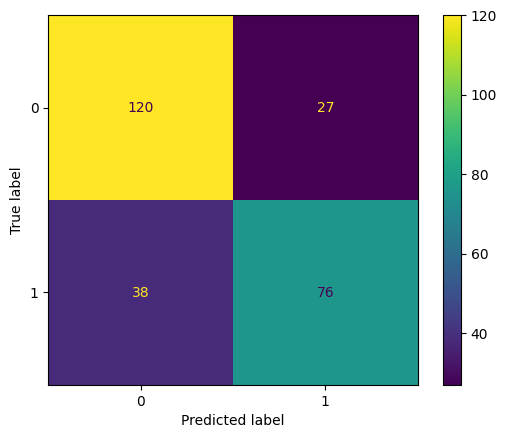

In [35]:
s = 0.4
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=s)
print('Test Size: ', s)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


(process:16708): Pango-WARNING **: 12:53:27.939: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


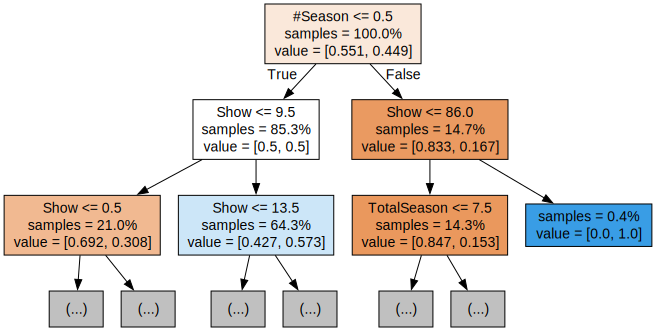


(process:13532): Pango-WARNING **: 12:53:28.423: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


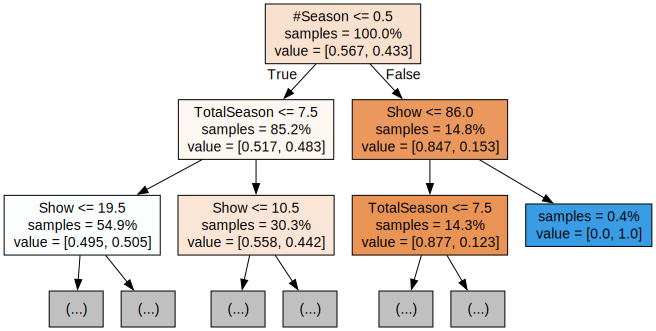


(process:2616): Pango-WARNING **: 12:53:28.913: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


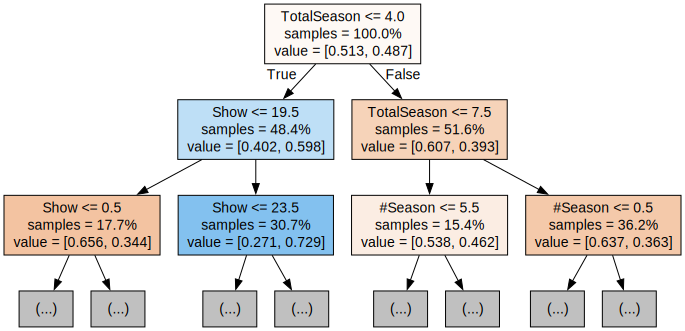

In [36]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Test Size:  0.5
Best hyperparameters: {'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.7300613496932515
Precision: 0.7661290322580645
Recall: 0.6168831168831169


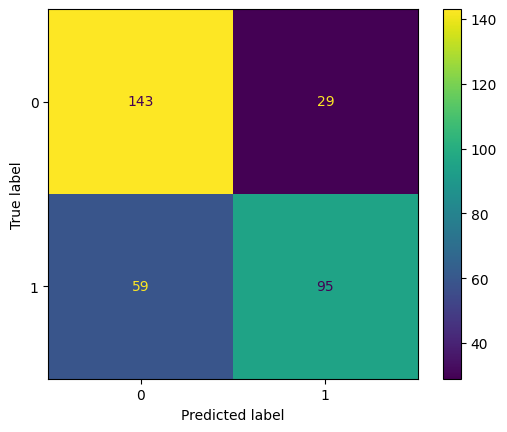

In [37]:
s = 0.5
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=s)
print('Test Size: ', s)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


(process:8736): Pango-WARNING **: 12:53:39.129: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


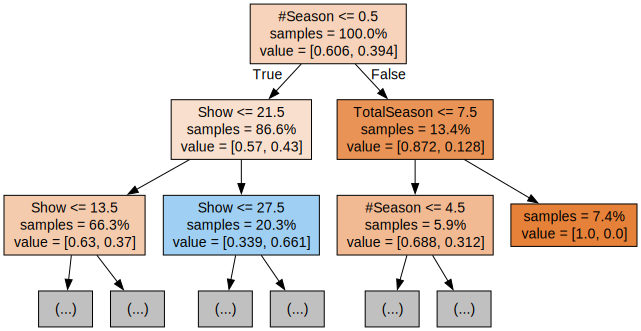


(process:22240): Pango-WARNING **: 12:53:39.704: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


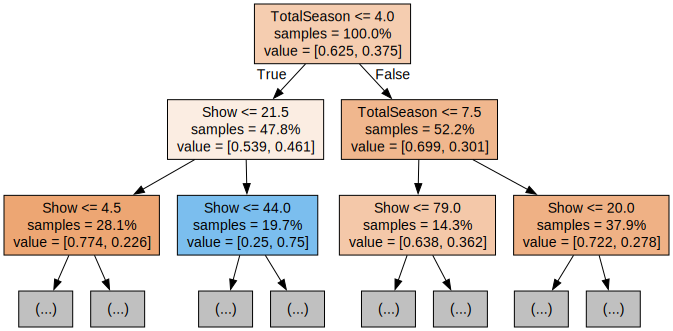


(process:16476): Pango-WARNING **: 12:53:40.187: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


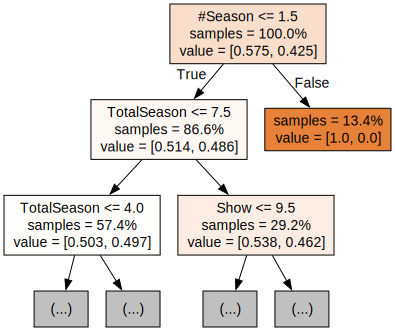

In [38]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)